<a href="https://colab.research.google.com/github/SamirAnsari07/Codesoft-Task/blob/main/CodeSoft_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

In [37]:

# Load the dataset
try:
    # Update the file path to the correct location and specify parameters
    df = pd.read_csv('/content/CreditCard.csv.txt', sep=',', engine='python')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: '/content/CreditCard.csv.txt' not found. Please make sure the file is in the correct directory.")
    # You might want to exit or provide instructions to the user here.
    # exit() # Removed exit() to allow subsequent cells to run and show potential errors
except Exception as e:
    print(f"An error occurred while reading the file: {e}")

Dataset loaded successfully.


In [38]:

# Display the first 5 rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   Time    V1    V2    V3    V4    V5    V6    V7    V8    V9  ...   V21  \
0     0  0.10  0.20  0.30  0.40  0.50  0.60  0.70  0.80  0.90  ...  2.10   
1     1  0.05  0.15  0.25  0.35  0.45  0.55  0.65  0.75  0.85  ...  2.05   
2     2  1.00  1.10  1.20  1.30  1.40  1.50  1.60  1.70  1.80  ...  3.00   
3     3  0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  ...  0.21   
4     4 -1.00 -1.10 -1.20 -1.30 -1.40 -1.50 -1.60 -1.70 -1.80  ... -3.00   

    V22   V23   V24   V25   V26   V27   V28  Amount  Class  
0  2.20  2.30  2.40  2.50  2.60  2.70  2.80   100.0      0  
1  2.15  2.25  2.35  2.45  2.55  2.65  2.75    50.0      0  
2  3.10  3.20  3.30  3.40  3.50  3.60  3.70   200.0      0  
3  0.22  0.23  0.24  0.25  0.26  0.27  0.28    10.0      0  
4 -3.10 -3.20 -3.30 -3.40 -3.50 -3.60 -3.70     1.0      1  

[5 rows x 31 columns]


In [39]:
# Get information about the dataset
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    6 non-null      int64  
 1   V1      6 non-null      float64
 2   V2      6 non-null      float64
 3   V3      6 non-null      float64
 4   V4      6 non-null      float64
 5   V5      6 non-null      float64
 6   V6      6 non-null      float64
 7   V7      6 non-null      float64
 8   V8      6 non-null      float64
 9   V9      6 non-null      float64
 10  V10     6 non-null      float64
 11  V11     6 non-null      float64
 12  V12     6 non-null      float64
 13  V13     6 non-null      float64
 14  V14     6 non-null      float64
 15  V15     6 non-null      float64
 16  V16     6 non-null      float64
 17  V17     6 non-null      float64
 18  V18     6 non-null      float64
 19  V19     6 non-null      float64
 20  V20     6 non-null      float64
 21  V21     6 non-null      floa

In [40]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [41]:
# Display descriptive statistics
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
           Time        V1        V2        V3        V4        V5        V6  \
count  6.000000  6.000000  6.000000  6.000000  6.000000  6.000000  6.000000   
mean   2.500000 -0.056667 -0.038333 -0.020000 -0.001667  0.016667  0.035000   
std    1.870829  0.669826  0.752872  0.839166  0.927802  1.018168  1.109842   
min    0.000000 -1.000000 -1.100000 -1.200000 -1.300000 -1.400000 -1.500000   
25%    1.250000 -0.372500 -0.445000 -0.517500 -0.590000 -0.662500 -0.735000   
50%    2.500000  0.030000  0.085000  0.140000  0.195000  0.250000  0.305000   
75%    3.750000  0.087500  0.187500  0.287500  0.387500  0.487500  0.587500   
max    5.000000  1.000000  1.100000  1.200000  1.300000  1.400000  1.500000   

             V7        V8        V9  ...       V21       V22       V23  \
count  6.000000  6.000000  6.000000  ...  6.000000  6.000000  6.000000   
mean   0.053333  0.071667  0.090000  ...  0.310000  0.328333  0.346667   
std    1.202525  1.296000  1.390108  ... 


Class Distribution:
Class
0    4
1    2
Name: count, dtype: int64


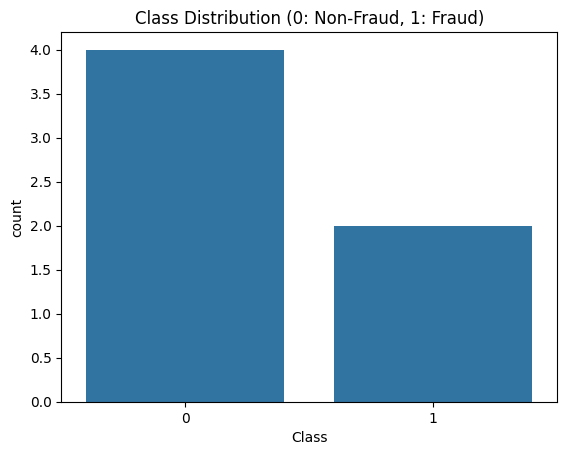

In [42]:
# Visualize the distribution of the target variable 'Class'
print("\nClass Distribution:")
print(df['Class'].value_counts())
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.show()


In [43]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

In [44]:
# Scale 'Amount' and 'Time' features as they have different scales
scaler = StandardScaler()
X[['Amount', 'Time']] = scaler.fit_transform(X[['Amount', 'Time']])

In [45]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training set class distribution:\n{y_train.value_counts()}")
print(f"Testing set class distribution:\n{y_test.value_counts()}")


Training set shape: (4, 30)
Testing set shape: (2, 30)
Training set class distribution:
Class
0    3
1    1
Name: count, dtype: int64
Testing set class distribution:
Class
1    1
0    1
Name: count, dtype: int64


In [46]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter

# Check how many samples are in each class
class_counts = Counter(y_train)
print("Original class distribution:", class_counts)

# Get the size of the minority class
minority_class_count = class_counts[min(class_counts, key=class_counts.get)]

# If enough samples, use SMOTE. Else, use RandomOverSampler.
if minority_class_count > 1:
    print("\nApplying SMOTE to handle class imbalance...")
    smote = SMOTE(random_state=42, k_neighbors=1) # k_neighbors=1 might still be needed for very small counts > 1
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
else:
    print("\nNot enough samples for SMOTE. Using RandomOverSampler instead...")
    ros = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Show result
print(f"\nTraining set shape after resampling: {X_train_resampled.shape}")
print(f"Training set class distribution after resampling:\n{Counter(y_train_resampled)}")

Original class distribution: Counter({0: 3, 1: 1})

Not enough samples for SMOTE. Using RandomOverSampler instead...

Training set shape after resampling: (6, 30)
Training set class distribution after resampling:
Counter({0: 3, 1: 3})


In [47]:
print(y_train.value_counts())


Class
0    3
1    1
Name: count, dtype: int64


In [48]:
print(f"\nTraining set shape after resampling: {X_train_resampled.shape}")
print(f"Training set class distribution after resampling:\n{Counter(y_train_resampled)}")


Training set shape after resampling: (6, 30)
Training set class distribution after resampling:
Counter({0: 3, 1: 3})


In [49]:
print("\nNot enough samples for SMOTE. Using RandomOverSampler instead...")
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)


Not enough samples for SMOTE. Using RandomOverSampler instead...


In [50]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter

# Check the class distribution in the training set
class_counts = Counter(y_train)
minority_class_count = min(class_counts.values())

# Safely handle class imbalance
if minority_class_count > 1:
    print("\nApplying SMOTE to handle class imbalance...")
    smote = SMOTE(random_state=42, k_neighbors=1)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
else:
    print("\nToo few samples in minority class for SMOTE. Using RandomOverSampler instead...")
    ros = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Output the new training set shape and class distribution
print(f"\nTraining set shape after resampling: {X_train_resampled.shape}")
print(f"Training set class distribution after resampling:\n{y_train_resampled.value_counts()}")




Too few samples in minority class for SMOTE. Using RandomOverSampler instead...

Training set shape after resampling: (6, 30)
Training set class distribution after resampling:
Class
0    3
1    3
Name: count, dtype: int64


In [51]:
y_train.value_counts()

# Output:
# Majority class (e.g., 0): 100
# Minority class (e.g., 1): 1  👈 Too few samples


,count
Class,
0,3
1,1


In [52]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)


In [53]:
from collections import Counter
from imblearn.over_sampling import SMOTE, RandomOverSampler

print("\nOriginal class distribution:", Counter(y_train))

# Try SMOTE if there are enough samples
if Counter(y_train).most_common()[-1][1] > 1:
    print("Applying SMOTE...")
    smote = SMOTE(random_state=42, k_neighbors=1)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
else:
    print("Not enough samples for SMOTE. Falling back to RandomOverSampler...")
    ros = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

print(f"Training set shape after resampling: {X_train_resampled.shape}")
print(f"Training set class distribution after resampling:\n{Counter(y_train_resampled)}")



Original class distribution: Counter({0: 3, 1: 1})
Not enough samples for SMOTE. Falling back to RandomOverSampler...
Training set shape after resampling: (6, 30)
Training set class distribution after resampling:
Counter({0: 3, 1: 3})


In [54]:
# Train a Random Forest Classifier
print("\nTraining Random Forest Classifier...")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)
print("Model training complete.")


Training Random Forest Classifier...
Model training complete.


In [55]:


# Evaluate the model
print("\nEvaluating the model on the test set...")
y_pred = model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Evaluating the model on the test set...

Confusion Matrix:
[[1 0]
 [0 1]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

